In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import math
from scipy.stats import pearsonr

warnings.filterwarnings('ignore')

In [2]:
household = pd.read_csv('hhpub.csv')
person = pd.read_csv('perpub.csv')
veh = pd.read_csv('vehpub.csv')
trip= pd.read_csv('trippub.csv')

In [3]:
# as only studying hh with car will also filter out hh with HHVEHCNT == 0
ny = household[household['HHSTATE'] =="NY"]
ny = ny[ny['HHVEHCNT']>0]

In [4]:
def cat_col_prop(data, col):
    print(pd.concat([data[col].value_counts(),
          data[col].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage')))

    sns.histplot(data[col])

## 1. Household

In [5]:
#15636 households in NY with at least one vehicle
ny.shape

(15636, 58)

In [6]:
ny.columns

Index(['HOUSEID', 'TRAVDAY', 'SAMPSTRAT', 'HOMEOWN', 'HHSIZE', 'HHVEHCNT',
       'HHFAMINC', 'PC', 'SPHONE', 'TAB', 'WALK', 'BIKE', 'CAR', 'TAXI', 'BUS',
       'TRAIN', 'PARA', 'PRICE', 'PLACE', 'WALK2SAVE', 'BIKE2SAVE', 'PTRANS',
       'HHRELATD', 'DRVRCNT', 'CNTTDHH', 'HHSTATE', 'HHSTFIPS', 'NUMADLT',
       'YOUNGCHILD', 'WRKCOUNT', 'TDAYDATE', 'HHRESP', 'LIF_CYC', 'MSACAT',
       'MSASIZE', 'RAIL', 'URBAN', 'URBANSIZE', 'URBRUR', 'SCRESP', 'CENSUS_D',
       'CENSUS_R', 'CDIVMSAR', 'HH_RACE', 'HH_HISP', 'HH_CBSA', 'RESP_CNT',
       'WEBUSE17', 'SMPLSRCE', 'WTHHFIN', 'HBHUR', 'HTHTNRNT', 'HTPPOPDN',
       'HTRESDN', 'HTEEMPDN', 'HBHTNRNT', 'HBPPOPDN', 'HBRESDN'],
      dtype='object')

min value: 0 should keep these values too 1411 occurences of total 15636 ( 9.024047070862114 %)


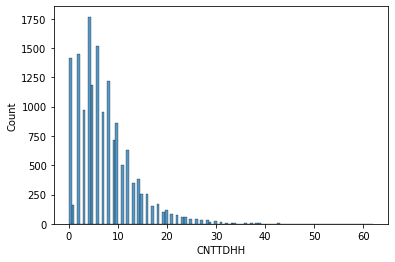

In [7]:
# label - cause of the zero values may not be able to log
sns.histplot(ny['CNTTDHH'])
print("min value:",str(min(ny['CNTTDHH'])),"should keep these values too",str(sum(ny['CNTTDHH']==0)), "occurences of total", len(ny), "(", str(sum(ny['CNTTDHH']==0)/len(ny)*100),"%)" )


### Core Based Statistical Area FIPS code

       counts  percentage
XXXXX    9571   61.211307
35620    4384   28.037861
40380     902    5.768739
15380     779    4.982093


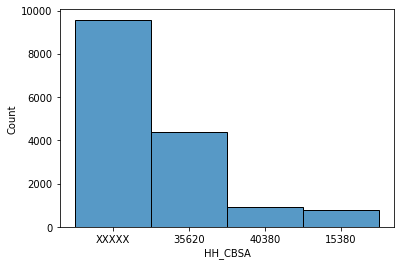

In [8]:
ny['HH_CBSA'].value_counts()

cat_col_prop(ny,'HH_CBSA')

# significant number of households under the 'XXXXX=Suppressed, in an MSA of less than 1 million ' category

In [9]:
ny.head()

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
2,30000012,5,3,1,1,2,10,1,1,3,...,2,79.419586,C,80,17000,17000,5000,60,17000,7000
8,30000082,3,3,2,4,2,8,1,1,5,...,2,1148.809332,T,20,1500,300,750,30,750,300
15,30000130,1,1,1,2,1,5,-9,1,-9,...,1,3829.959655,U,60,30000,17000,5000,70,30000,17000
39,30000380,2,3,2,3,1,3,1,1,2,...,2,370.744472,S,50,3000,1500,1500,50,3000,1500
44,30000434,7,3,1,2,2,8,1,1,3,...,2,101.472420,R,30,1500,750,750,30,750,300


### Travel Dat of Week Lower

In [10]:
#relatively equal number of days of the week
ny['TRAVDAY'].value_counts()

2    2274
5    2269
1    2251
7    2247
6    2228
3    2203
4    2164
Name: TRAVDAY, dtype: int64

### Home ownership

     counts  percentage
 1    12796   81.836787
 2     2722   17.408544
 97     117    0.748273
-7        1    0.006395


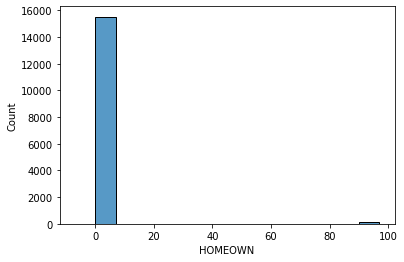

In [11]:
# Majority Own home while 17 percent rent the rest to replace with 'NA' (to remove while one hot encoding)

cat_col_prop(ny,'HOMEOWN')

ny['HOMEOWN'] = ny['HOMEOWN'].replace({1:"HOME_OWN",
                                       2: "HOME_RENT",
                                      97: "NA",
                                      -7: "NA"})

### HHSIZE

    counts  percentage
2     6928   44.308007
1     4691   30.001279
3     1965   12.567153
4     1389    8.883346
5      467    2.986697
6      123    0.786646
7       44    0.281402
8       17    0.108723
9        7    0.044768
10       4    0.025582
11       1    0.006395
________
new HHSIZE
    counts  percentage
2     6928   44.308007
1     4691   30.001279
>3    2052   13.123561
3     1965   12.567153


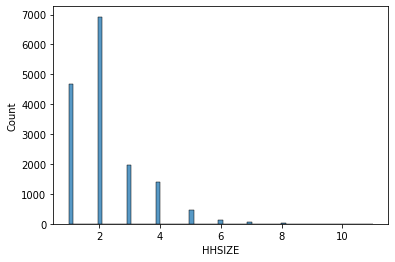

In [12]:

cat_col_prop(ny,'HHSIZE')

# to bin tail HHSIZE

ny['HHSIZE'][ny['HHSIZE']>3] = ">3"

print("________")
print("new HHSIZE")
print(pd.concat([ny['HHSIZE'].value_counts(),
          ny['HHSIZE'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
    )

### HHVEHCTN

    counts  percentage
2     6334   40.509082
1     5821   37.228191
3     2257   14.434638
4      795    5.084421
5      281    1.797135
6       92    0.588386
7       34    0.217447
8       12    0.076746
9        6    0.038373
11       2    0.012791
12       2    0.012791
________
new HHVEHCNT
    counts  percentage
2     6334   40.509082
1     5821   37.228191
>2    3481   22.262727


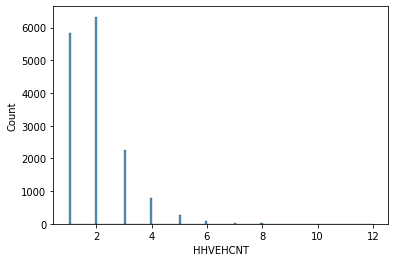

In [13]:
cat_col_prop(ny,'HHVEHCNT')

ny['HHVEHCNT'][ny['HHVEHCNT']>2] = ">2"

print("________")
print("new HHVEHCNT")
print(pd.concat([ny['HHVEHCNT'].value_counts(),
          ny['HHVEHCNT'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
    )

### HHFAMINC

     counts  percentage
 6     2870   18.355078
 7     2180   13.942185
 5     1874   11.985162
 8     1667   10.661294
 4     1446    9.247889
 3     1234    7.892044
 9      961    6.146073
 11     922    5.896649
 10     886    5.666411
 2      610    3.901254
-7      489    3.127398
 1      419    2.679713
-8       76    0.486058
-9        2    0.012791


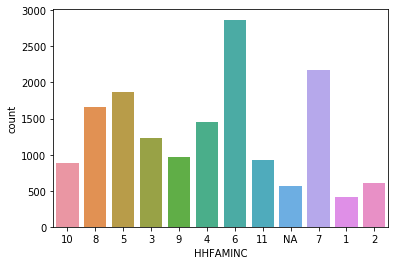

In [14]:
# Group all negative as 'NA'

print(pd.concat([ny['HHFAMINC'].value_counts(),
          ny['HHFAMINC'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

ny['HHFAMINC'][ny['HHFAMINC'].isin([-9,-8,-7])]  = "NA"

sns.countplot(data = ny, x= 'HHFAMINC')

### DRVRCNT

Pearson Corelation of:  0.8662732357377938 between DRVRCNT and NUMADLT. May remove one is too many variables


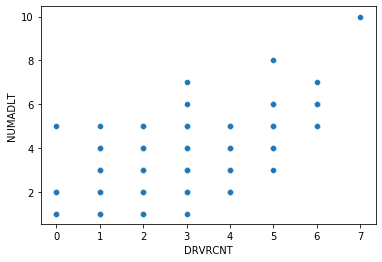

In [20]:

corr,_ = pearsonr(ny['DRVRCNT'],ny['NUMADLT'])
print("Pearson Corelation of: ",str(corr), "between DRVRCNT and NUMADLT. May remove one is too many variables")

sns.scatterplot(x = ny['DRVRCNT'], y = ny['NUMADLT'])
#

   counts  percentage
2    8176   52.289588
1    5849   37.407265
3    1187    7.591456
4     316    2.020977
0      56    0.358148
5      44    0.281402
6       7    0.044768
7       1    0.006395
_______________________
new value counts for DRVRCNT
    counts  percentage
2     8176   52.289588
1     5849   37.407265
>2    1555    9.944999
0       56    0.358148


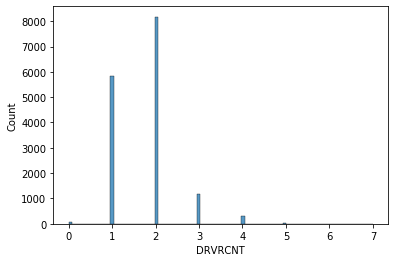

In [21]:
cat_col_prop(ny,'DRVRCNT')

# will bin those with >2 drivers together
ny['DRVRCNT'][ny['DRVRCNT']>2] = ">2"

print("_______________________")
print("new value counts for DRVRCNT")

print(pd.concat([ny['DRVRCNT'].value_counts(),
          ny['DRVRCNT'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

In [22]:
# interestingly got 0.3% of the household got 0 drivers but have cars 
ny[ny['DRVRCNT']==0].describe() 

,HOUSEID,TRAVDAY,SAMPSTRAT,PC,SPHONE,TAB,WALK,BIKE,CAR,TAXI,...,WEBUSE17,SMPLSRCE,WTHHFIN,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,3.550968e+07,4.178571,2.714286,2.607143,2.214286,2.839286,1.803571,2.553571,2.410714,2.571429,...,2.321429,1.928571,328.238331,26.000000,2998.053571,1402.517857,999.839286,25.107143,3134.660714,1448.053571
std,5.075576e+06,1.973526,1.090693,3.251174,4.305237,4.035194,4.730634,5.141346,1.474348,5.134047,...,2.867417,0.259870,673.880020,17.964612,5539.648609,2823.995963,1461.105307,19.704802,5582.059093,2822.493961
min,3.008108e+07,1.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-1.000000,-9.000000,...,-9.000000,1.000000,15.259318,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,3.032250e+07,3.000000,2.000000,1.000000,1.000000,2.000000,1.000000,4.000000,2.000000,4.000000,...,1.000000,2.000000,53.999105,16.250000,50.000000,50.000000,25.000000,5.000000,300.000000,50.000000
50%,4.007016e+07,4.000000,3.000000,3.000000,5.000000,5.000000,4.000000,5.000000,2.000000,5.000000,...,1.500000,2.000000,142.212181,20.000000,300.000000,300.000000,150.000000,20.000000,750.000000,300.000000
75%,4.039824e+07,6.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,...,5.000000,2.000000,290.463949,40.000000,3000.000000,1500.000000,1500.000000,40.000000,3000.000000,1500.000000
max,4.077127e+07,7.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,2.000000,3834.854389,70.000000,30000.000000,17000.000000,5000.000000,90.000000,30000.000000,17000.000000


In [23]:
print(pd.concat([ny['DRVRCNT'].value_counts(),
          ny['DRVRCNT'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

    counts  percentage
2     8176   52.289588
1     5849   37.407265
>2    1555    9.944999
0       56    0.358148


### NUMADLT / YOUNGCHILD / WRKCOUNT  (TBC)

    counts  percentage
2     8876   56.766436
1     5018   32.092607
3     1316    8.416475
4      348    2.225633
5       66    0.422103
6        8    0.051164
7        2    0.012791
8        1    0.006395
10       1    0.006395
_______________________
new value counts for NUMADLT
    counts  percentage
2     8876   56.766436
1     5018   32.092607
>2    1742   11.140957


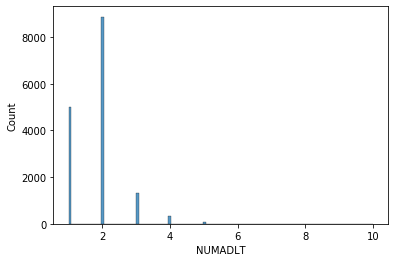

In [24]:
cat_col_prop(ny,'NUMADLT')

# will bin those with >2 adults together
ny['NUMADLT'][ny['NUMADLT']>2] = ">2"

print("_______________________")
print("new value counts for NUMADLT")

print(pd.concat([ny['NUMADLT'].value_counts(),
          ny['NUMADLT'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

### URBAN/ URBBUR/ URBANSIZE/ HBHUR (TBC)

## 2. Trip

In [192]:
trip.head()

,HOUSEID,PERSONID,TDTRPNUM,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,30000007,1,1,1000,1015,15,5.244,3,0,0,...,20,750,300,50,750,300,350,30,300,300
1,30000007,1,2,1510,1530,20,5.149,3,0,0,...,30,300,300,50,1500,750,750,20,750,300
2,30000007,2,1,700,900,120,84.004,6,0,0,...,40,1500,750,50,1500,750,750,20,750,300
3,30000007,2,2,1800,2030,150,81.628,6,0,0,...,20,750,300,40,1500,750,750,40,1500,750
4,30000007,3,1,845,900,15,2.250,3,0,0,...,20,750,300,50,750,300,350,60,750,300


In [170]:
[c for c in trip.columns]

['HOUSEID',
 'PERSONID',
 'TDTRPNUM',
 'STRTTIME',
 'ENDTIME',
 'TRVLCMIN',
 'TRPMILES',
 'TRPTRANS',
 'TRPACCMP',
 'TRPHHACC',
 'VEHID',
 'TRWAITTM',
 'NUMTRANS',
 'TRACCTM',
 'DROP_PRK',
 'TREGRTM',
 'WHODROVE',
 'WHYFROM',
 'LOOP_TRIP',
 'TRPHHVEH',
 'HHMEMDRV',
 'HH_ONTD',
 'NONHHCNT',
 'NUMONTRP',
 'PSGR_FLG',
 'PUBTRANS',
 'TRIPPURP',
 'DWELTIME',
 'TDWKND',
 'VMT_MILE',
 'DRVR_FLG',
 'WHYTRP1S',
 'ONTD_P1',
 'ONTD_P2',
 'ONTD_P3',
 'ONTD_P4',
 'ONTD_P5',
 'ONTD_P6',
 'ONTD_P7',
 'ONTD_P8',
 'ONTD_P9',
 'ONTD_P10',
 'ONTD_P11',
 'ONTD_P12',
 'ONTD_P13',
 'TDCASEID',
 'TRACC_WLK',
 'TRACC_POV',
 'TRACC_BUS',
 'TRACC_CRL',
 'TRACC_SUB',
 'TRACC_OTH',
 'TREGR_WLK',
 'TREGR_POV',
 'TREGR_BUS',
 'TREGR_CRL',
 'TREGR_SUB',
 'TREGR_OTH',
 'WHYTO',
 'TRAVDAY',
 'HOMEOWN',
 'HHSIZE',
 'HHVEHCNT',
 'HHFAMINC',
 'DRVRCNT',
 'HHSTATE',
 'HHSTFIPS',
 'NUMADLT',
 'WRKCOUNT',
 'TDAYDATE',
 'HHRESP',
 'LIF_CYC',
 'MSACAT',
 'MSASIZE',
 'RAIL',
 'URBAN',
 'URBANSIZE',
 'URBRUR',
 'GASPRICE',
 'CE

In [227]:
trip = trip[['HOUSEID','TRAVDAY','TRPMILES','TRPHHVEH','TRPTRANS','WHYTRP1S','WHYTRP90']]
ny_trip = trip[trip['HOUSEID'].isin(ny['HOUSEID'])]

In [228]:
ny_trip.shape

(113616, 7)

### Trip Transport

In [229]:
ny_trip['TRPTRANS'].value_counts()
# TO CHECK 8 - do we want to count motorbike/mopeds as vehicles???
ny_trip = ny_trip[ny_trip['TRPTRANS'].isin([3,4,5,6,8])]


,counts,percentages
6,15094,15.530085
7,14306,14.719318
5,14099,14.506338
4,14081,14.487818
3,13809,14.207960
2,13625,14.018644
1,12178,12.529838


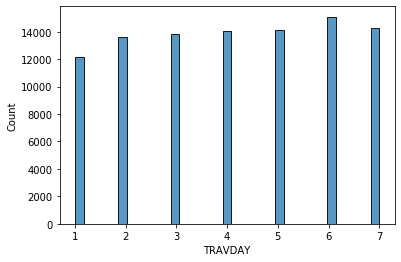

In [230]:
sns.histplot(ny_trip['TRAVDAY'])

pd.concat([ny_trip['TRAVDAY'].value_counts(),
           ny_trip['TRAVDAY'].value_counts(normalize = True).mul(100)],
          axis = 1, keys=('counts','percentages'))

In [231]:
ny_trip.groupby('HOUSEID').agg({'TRPTRANS':'size',
                               ''})

SyntaxError: invalid syntax (<ipython-input-231-b032764f842e>, line 2)

## Why Trip

In [263]:
# since only 24 lines with trip distance <= 0, removed lines
print('# of trips with dist <=0', str(sum(ny_trip['TRPMILES']<=0)),' out of', str(len(ny_trip)))

ny_trip = ny_trip[ny_trip['TRPMILES']>0]

# of trips with dist <=0 24  out of 97192


In [400]:
purpose_summ = ny_trip.groupby(['HOUSEID','WHYTRP90']).agg(avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        mod  = ('TRPMILES', lambda x: x.value_counts().index[0])
                                           ).unstack().reset_index()

In [405]:
ny_trip.groupby(['HOUSEID','WHYTRP90']).agg(avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        mod  = ('TRPMILES', lambda x: x.value_counts().index[0]),
                                            skew = ('TRPMILES','skew'),
                                            count = ('TRPMILES','count')
                                           )

avg      med     mod      skew  count
HOUSEID  WHYTRP90                                            
30000012 1          7.95250   7.9525   6.818       NaN      2
         2          4.29100   4.2910   4.291       NaN      1
         8         48.87900  48.8790  49.457       NaN      2
         10         2.21575   2.2270   3.395 -0.000946      4
30000082 1          1.75200   1.7520   0.777       NaN      2
...                     ...      ...     ...       ...    ...
40793974 8          5.01800   5.0180   5.018       NaN      1
         10         3.62175   3.6370   3.496 -0.073407      4
40794020 3          5.27800   5.2660   5.266  1.732051      3
         4          0.83600   0.8360   0.836       NaN      2
         6         18.71050  18.7105  22.182       NaN      2

[35191 rows x 5 columns]

In [397]:
ny_trip[['TRPMILES','HOUSEID']][ny_trip['WHYTRP90']==1].groupby('HOUSEID').agg(avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        mod  = ('TRPMILES', lambda x: x.value_counts().index[0])
                                           )

,avg,med,mod
HOUSEID,,,
30000012,7.95250,7.9525,6.818
30000082,1.75200,1.7520,0.777
30000380,1.18150,1.1815,1.191
30000436,1.24650,1.2465,0.678
30000439,0.08150,0.0815,0.082
...,...,...,...
40792273,12.59175,12.2710,7.085
40792390,4.86325,2.7365,1.563
40792484,2.53500,2.5350,2.535


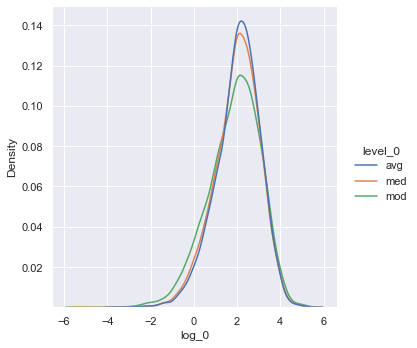

In [395]:
sns.displot(purpose_summ, x= 'log_0', hue = 'level_0',kind = 'kde')

In [346]:
why = ny_trip.groupby(['HOUSEID','WHYTRP90']).agg(#avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        #mod  = ('TRPMILES', lambda x: x.value_counts().index[0])
                                           ).unstack().reset_index()

In [347]:
[c for c in why]

[('HOUSEID', ''),
 ('med', 1),
 ('med', 2),
 ('med', 3),
 ('med', 4),
 ('med', 5),
 ('med', 6),
 ('med', 8),
 ('med', 10),
 ('med', 11),
 ('med', 99)]

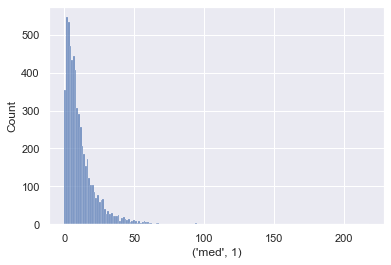

In [348]:
sns.histplot(why[('med',1)])

In [349]:
why

HOUSEID     med                                                   \
WHYTRP90                 1       2       3       4       5        6       8   
0         30000012  7.9525   4.291     NaN     NaN     NaN      NaN  48.879   
1         30000082  1.7520  29.293  2.1360  1.8925     NaN      NaN     NaN   
2         30000380  1.1815     NaN  2.2100     NaN     NaN   1.9610     NaN   
3         30000434     NaN   0.168  0.2730     NaN     NaN      NaN     NaN   
4         30000436  1.2465     NaN  1.5460     NaN     NaN      NaN     NaN   
...            ...     ...     ...     ...     ...     ...      ...     ...   
13587     40793669     NaN     NaN  1.1635     NaN     NaN      NaN     NaN   
13588     40793685     NaN     NaN  5.0780     NaN  1.1315      NaN     NaN   
13589     40793808     NaN     NaN  4.4920  4.4740     NaN      NaN     NaN   
13590     40793974     NaN     NaN  6.6095     NaN     NaN      NaN   5.018   
13591     40794020     NaN     NaN  5.2660  0.8360     NaN  18.7105     NaN   

                               
WHYTRP90       10      11  99  
0          2.2270     NaN NaN  
1         45.0065     NaN NaN  
2             NaN     NaN NaN  
3         10.0790     NaN NaN  
4             NaN     NaN NaN  
...           ...     ...  ..  
13587         NaN  1.1635 NaN  
13588      3.0800     NaN NaN  
13589      1.8145  3.7480 NaN  
13590      3.6370     NaN NaN  
13591         NaN     NaN NaN  

[13592 rows x 11 columns]

In [317]:
new  = pd.DataFrame()
for i in range(1, len(why.columns)):
    new[why_col[i]] = np.isnan(why.iloc[:,i])

In [337]:
chart_data = new.stack().reset_index()

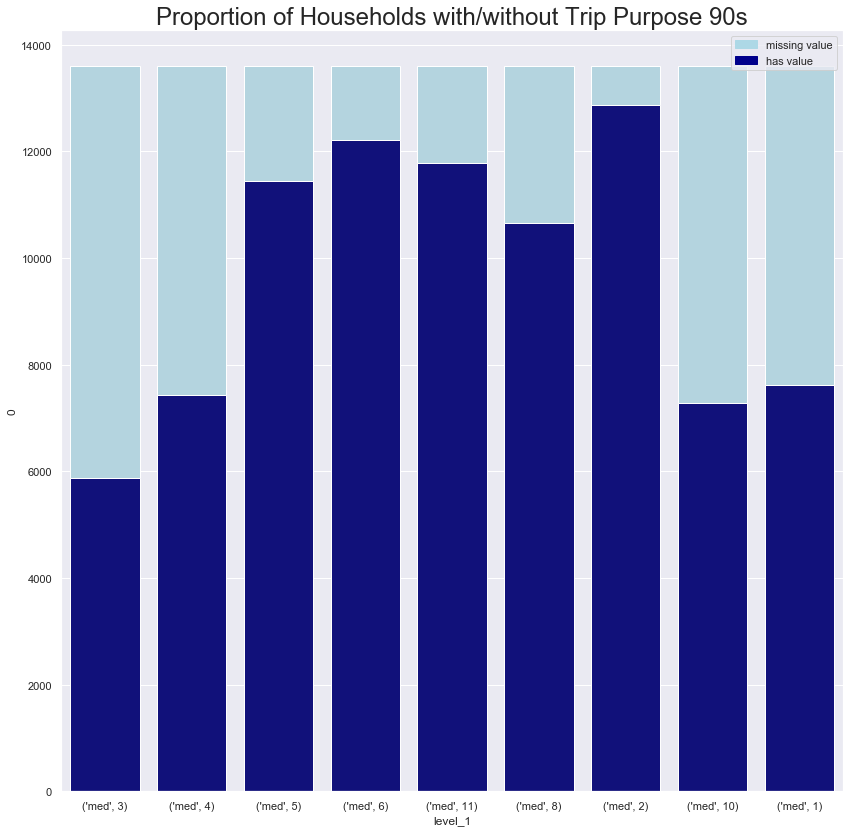

In [374]:
import matplotlib.patches as mpatches

sns.set(style="darkgrid")
plt.figure(figsize=(14, 14))

full_data = chart_data.groupby('level_1')[0].count().reset_index()

bar1= sns.barplot(data = full_data, x = "level_1", y = 0, color = 'lightblue')

has_value = chart_data[chart_data[0]==True]

bar2 = sns.barplot(data = has_value, estimator = sum, ci = None, x = "level_1", y = 0, color = 'darkblue')

bottom_bar = mpatches.Patch(color = 'darkblue', label = 'has value')
top_bar = mpatches.Patch(color = 'lightblue', label = 'missing value')

plt.title('Proportion of Households with/without Trip Purpose 90s', fontsize = 24)
plt.legend(handles = [top_bar, bottom_bar])
plt.show()

In [370]:
chart_data

,level_0,level_1,0
0,0,"(med, 1)",False
1,0,"(med, 2)",False
2,0,"(med, 3)",True
3,0,"(med, 4)",True
4,0,"(med, 5)",True
...,...,...,...
122323,13591,"(med, 5)",True
122324,13591,"(med, 6)",False
122325,13591,"(med, 8)",True
122326,13591,"(med, 10)",True


In [363]:
13592*9

122328

In [275]:
one = pd.qcut(why[('med',1)],5)

In [276]:
one.value_counts()

(0.004, 3.112]       1195
(6.273, 10.232]      1195
(17.412, 217.858]    1194
(3.112, 6.273]       1192
(10.232, 17.412]     1192
Name: (med, 1), dtype: int64